In [1]:
pip install pandas geopandas matplotlib


Note: you may need to restart the kernel to use updated packages.


C:\Users\82104\AppData\Local\Temp/ipykernel_54848/3448001796.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
C:\Users\82104\AppData\Local\Temp/ipykernel_54848/3448001796.py:42: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row.name.capitalize(), xy=(row.geometry.centroid.x, row.geometry.centroid.y),


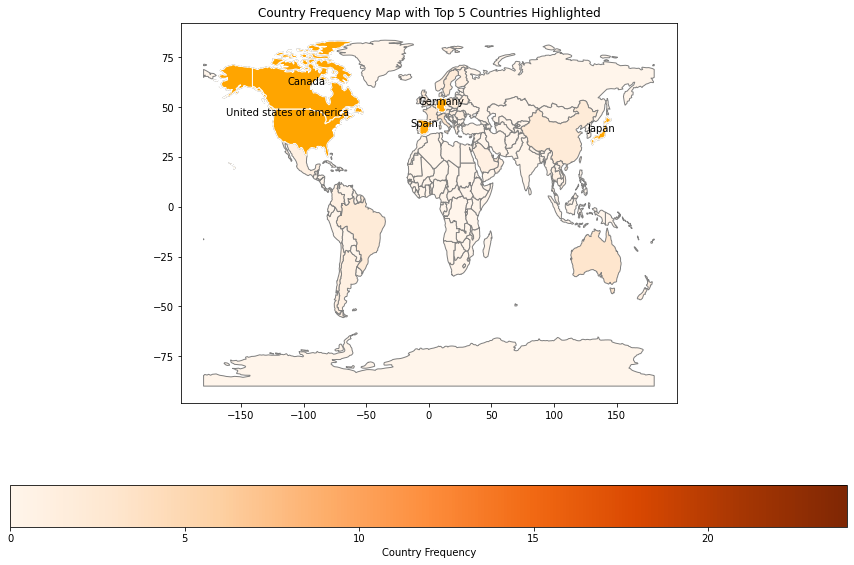

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# CSV 파일 읽기
df = pd.read_csv('destination_mood.csv')

# 나라별 빈도 계산
nation_counts = df['nation'].value_counts()

# GeoPandas 세계 지도 데이터 가져오기
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 나라 이름을 소문자로 변환하여 병합 준비
world['name'] = world['name'].str.lower()
nation_counts.index = nation_counts.index.str.lower()

# GeoPandas 데이터프레임과 빈도 데이터 병합
world = world.set_index('name').join(nation_counts.rename('counts'))

# 빈도가 NaN인 값을 0으로 설정
world['counts'] = world['counts'].fillna(0)

# 상위 5개 국가 추출
top_5_nations = nation_counts.head(6).index

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 빈도에 따라 색상 설정 (기본 지도 색상을 주황색으로 설정)
world.plot(column='counts', ax=ax, legend=True,
           legend_kwds={'label': "Country Frequency",
                        'orientation': "horizontal"},
           cmap='Oranges', edgecolor='gray')

# 상위 5개 국가는 파란색으로 표시
top_5 = world.loc[world.index.isin(top_5_nations)]
top_5.plot(ax=ax, color='orange', edgecolor='white')

# 나라 이름 표시 (검은색 텍스트)
for idx, row in top_5.iterrows():
    plt.annotate(s=row.name.capitalize(), xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                 horizontalalignment='center', fontsize=10, color='black')

# 제목 추가
plt.title('Country Frequency Map with Top 5 Countries Highlighted')
plt.show()
